<a href="https://colab.research.google.com/github/alfonso777/deeplearning-rehearsal/blob/master/deeeplarning_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch

**Author**: Jhosimar George Arias Figueroa

Based on ([PyTorch Tutorials](https://pytorch.org/tutorials/)) with some modifications.


What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

In [0]:
import torch

Getting Started
---------------

Tensors
-------

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.


Construct a 5x3 matrix, uninitialized:

In [0]:
x = torch.empty(5, 3)
print(x)

tensor([[7.9914e-37, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8026e-45],
        [0.0000e+00, 1.1210e-44, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 1.0643e+15]])


Construct a randomly initialized matrix:

In [0]:
x = torch.rand(5, 3)
print(x)

tensor([[0.8469, 0.4929, 0.2324],
        [0.2289, 0.8863, 0.2346],
        [0.1516, 0.3457, 0.7683],
        [0.8728, 0.7493, 0.0541],
        [0.7661, 0.7095, 0.7358]])


Construct a matrix filled zeros and of dtype long:

In [0]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:

In [0]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user

In [0]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.6221, -2.0021,  0.0463],
        [ 0.4164,  0.5748,  0.9455],
        [ 0.3360, -0.8761,  0.1201],
        [-0.5228,  1.7988,  0.6103],
        [-0.9601, -0.2519, -3.2160]])


Get its size:

In [0]:
print(x.size())

torch.Size([5, 3])


<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` is in fact a tuple, so it supports all tuple operations.</p></div>

Operations
----------

There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1

In [0]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 2.6177, -1.5782,  0.3608],
        [ 0.5678,  0.7580,  1.6895],
        [ 0.7335, -0.4324,  0.8854],
        [-0.3362,  2.2373,  1.5348],
        [-0.6646,  0.3290, -2.6985]])


Addition: syntax 2

In [0]:
print(torch.add(x, y))

tensor([[ 2.6177, -1.5782,  0.3608],
        [ 0.5678,  0.7580,  1.6895],
        [ 0.7335, -0.4324,  0.8854],
        [-0.3362,  2.2373,  1.5348],
        [-0.6646,  0.3290, -2.6985]])


Addition: providing an output tensor as argument

In [0]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 2.6177, -1.5782,  0.3608],
        [ 0.5678,  0.7580,  1.6895],
        [ 0.7335, -0.4324,  0.8854],
        [-0.3362,  2.2373,  1.5348],
        [-0.6646,  0.3290, -2.6985]])


Addition: in-place

In [0]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 2.6177, -1.5782,  0.3608],
        [ 0.5678,  0.7580,  1.6895],
        [ 0.7335, -0.4324,  0.8854],
        [-0.3362,  2.2373,  1.5348],
        [-0.6646,  0.3290, -2.6985]])


<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

Indexing
--------

You can use standard NumPy-like indexing with all bells and whistles!

In [0]:
print(x[:, 1])

tensor([-2.0021,  0.5748, -0.8761,  1.7988, -0.2519])


Resizing: If you want to resize/reshape tensor, you can use ``torch.view``:

In [0]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number

In [0]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.4673])
0.4672677516937256


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described [here](http://pytorch.org/docs/torch).

NumPy Bridge
------------

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.

Converting a Torch Tensor to a NumPy Array
------------------------------------------

In [0]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [0]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


See how the numpy array changed in value.

In [0]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Converting NumPy Array to Torch Tensor
--------------------------------------
See how changing the np array changed the Torch Tensor automatically

In [0]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto any device using the ``.to`` method.

In [0]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!


Autograd: Automatic Differentiation
===================================

Central to all neural networks in PyTorch is the ``autograd`` package.
Let’s first briefly visit this, and we will then go to training our
first neural network.


The ``autograd`` package provides automatic differentiation for all operations
on Tensors. It is a define-by-run framework, which means that your backprop is
defined by how your code is run, and that every single iteration can be
different.

Let us see this in more simple terms with some examples.

Tensor
--------

``torch.Tensor`` is the central class of the package. If you set its attribute ``.requires_grad`` as ``True``, it starts to track all operations on it. When
you finish your computation you can call ``.backward()`` and have all the
gradients computed automatically. The gradient for this tensor will be
accumulated into ``.grad`` attribute.

To stop a tensor from tracking history, you can call ``.detach()`` to detach it from the computation history, and to prevent future computation from being tracked.

If you want to compute the derivatives, you can call ``.backward()`` on
a ``Tensor``. If ``Tensor`` is a scalar (i.e. it holds a one element
data), you don’t need to specify any arguments to ``backward()``,
however if it has more elements, you need to specify a ``gradient``
argument that is a tensor of matching shape.

Create a tensor and set requires_grad=True to track computation with it

In [0]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Do an operation of tensor:

In [0]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


Do more operations on y

In [0]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


``.requires_grad_( ... )`` changes an existing Tensor's ``requires_grad``
flag in-place. The input flag defaults to ``False`` if not given.

In [0]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


Gradients
---------
Let's backprop now. Because ``out`` contains a single scalar, ``out.backward()`` is
equivalent to ``out.backward(torch.tensor(1))``.

In [0]:
out.backward()


print gradients d(out)/dx

In [0]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You should have got a matrix of ``4.5``. Let’s call the ``out``
*Tensor* “$o$”.
We have that $o = \frac{1}{4}\sum_i z_i$,
$z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$.
Therefore,
$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence
$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.

You can do many crazy things with autograd!

In [0]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-1044.6628,  -303.0750,   414.6512], grad_fn=<MulBackward0>)


In [0]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


You can also stop autograd from tracking history on Tensors
with ``.requires_grad=True`` by wrapping the code block in
``with torch.no_grad()``:

In [0]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
	print((x ** 2).requires_grad)

True
True
False


Let's see another example

In [0]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

Build a computational graph

In [0]:
y = w * x + b    # y = 2 * x + 3

Compute gradients

In [0]:
y.backward()

Print out the gradients.

In [0]:
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


**Read Later:**

Documentation of ``autograd`` and ``Function`` is at
http://pytorch.org/docs/autograd


Neural Networks
===============

Neural networks can be constructed using the ``torch.nn`` package.

Now that you had a glimpse of ``autograd``, ``nn`` depends on
``autograd`` to define models and differentiate them.
An ``nn.Module`` contains layers, and a method ``forward(input)`` that
returns the ``output``.

For example, look at this network that classifies digit images:

![alt text](https://pytorch.org/tutorials/_images/mnist.png)

It is a simple feed-forward network. It takes the input, feeds it
through several layers one after the other, and then finally gives the
output.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  ``weight = weight - learning_rate * gradient``

In [0]:
import torch
from torch import nn
from torch.nn import functional as F


Fully Connected Networks
------------------

Let’s define a network:

In [0]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size) 
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)  
    
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [0]:
input_size = 20
hidden_size = 15
num_classes = 10

model = NeuralNet(input_size, hidden_size, num_classes)
print(model)

NeuralNet(
  (fc1): Linear(in_features=20, out_features=15, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=15, out_features=10, bias=True)
)


You just have to define the forward function, and the backward function (where gradients are computed) is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function.

The learnable parameters of a model are returned by model.parameters()

In [0]:
params = list(model.parameters())
print(len(params))
print(params[0].size())  # fc1 .weight

4
torch.Size([15, 20])


Let's try a random input Note: Expected input size to this model was defined before.

In [0]:
input = torch.randn(10, input_size)
out = model(input)
print(out)

tensor([[-0.3366, -0.3262,  0.1262,  0.1122, -0.1648,  0.0553,  0.2974, -0.3317,
         -0.0131, -0.1660],
        [-0.4316, -0.2825,  0.4979,  0.3525,  0.1117, -0.4154,  0.4297, -0.1031,
         -0.3312, -0.1835],
        [-0.3514, -0.3875,  0.3004,  0.2543, -0.2015, -0.1148, -0.0224, -0.1745,
         -0.0507, -0.1782],
        [-0.2525, -0.2263,  0.1872, -0.1303,  0.2125,  0.1513,  0.2712, -0.0705,
         -0.2999, -0.1302],
        [-0.3813, -0.3078,  0.1688,  0.1435,  0.1487,  0.1494,  0.1553,  0.0492,
         -0.1610, -0.1348],
        [-0.4707, -0.3278,  0.5179,  0.1582, -0.2517, -0.8252,  0.6730, -0.3209,
         -0.4717, -0.1371],
        [-0.8131, -0.5913, -0.1869,  0.5097,  0.1530,  0.4011,  0.3889, -0.0513,
         -0.2964, -0.2796],
        [-0.6971, -0.2598,  0.6605,  0.0241,  0.0891, -0.4725,  0.6968, -0.1004,
         -0.2265, -0.2517],
        [-0.3585, -0.2651,  0.3954, -0.0247, -0.0337, -0.3034,  0.5450, -0.4167,
         -0.2986, -0.2984],
        [-0.5471, -

Zero the gradient buffers of all parameters and backprops with random
gradients:

In [0]:
model.zero_grad()
out.backward(torch.randn(10, 10))

Loss Function
-------------
A loss function takes the (output, target) pair of inputs, and computes a
value that estimates how far away the output is from the target.

There are several different loss functions http://pytorch.org/docs/nn.html under the
nn package .
A simple loss is: ``nn.MSELoss`` which computes the mean-squared error
between the input and the target.

For example:

In [0]:
target = torch.randn(10, 10)  # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(out, target)
print(loss)

tensor(1.1787, grad_fn=<MseLossBackward>)


Now, if you follow ``loss`` in the backward direction, using its
``.grad_fn`` attribute, you will see a graph of computations that looks
like this:


    input -> fc1 -> relu -> fc2 -> MSELoss  -> loss

So, when we call ``loss.backward()``, the whole graph is differentiated
w.r.t. the loss, and all Tensors in the graph that has ``requires_grad=True``
will have their ``.grad`` Tensor accumulated with the gradient.

For illustration, let us follow a few steps backward:



In [0]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

Backprop
--------
To backpropagate the error all we have to do is to ``loss.backward()``.
You need to clear the existing gradients though, else gradients will be
accumulated to existing gradients.


Now we shall call ``loss.backward()``, and have a look at conv1's bias
gradients before and after the backward.


In [0]:
model.zero_grad()     # zeroes the gradient buffers of all parameters

print('fc1.bias.grad before backward')
print(model.fc1.bias.grad)

loss.backward()

print('fc1.bias.grad after backward')
print(model.fc1.bias.grad)

fc1.bias.grad before backward
None
fc1.bias.grad after backward
tensor([-0.0006, -0.0044,  0.0501,  0.0357, -0.0167, -0.0191,  0.0358, -0.0173,
         0.0400, -0.0256,  0.0004, -0.0032, -0.0110,  0.0080,  0.0099])


Now, we have seen how to use loss functions.

**Read Later:**

  The neural network package contains various modules and loss functions
  that form the building blocks of deep neural networks. A full list with
  documentation is `here <http://pytorch.org/docs/nn>`_.

**The only thing left to learn is:**

  - Updating the weights of the network

Update the weights
------------------
The simplest update rule used in practice is the Stochastic Gradient
Descent (SGD):

     ``weight = weight - learning_rate * gradient``

We can implement this using simple python code:

    learning_rate = 0.01
    for f in net.parameters():
        f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different
update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc.
To enable this, we built a small package: ``torch.optim`` that
implements all these methods. Using it is very simple:



In [0]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = model(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

Note

      Observe how gradient buffers had to be manually set to zero using
      ``optimizer.zero_grad()``. This is because gradients are accumulated
      as explained in `Backprop`_ section.


What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
[torchvision](https://pytorch.org/docs/stable/torchvision/index.html), that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].

In [0]:
batch_size = 100

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

0it [00:00, ?it/s]

9920512it [00:01, 8096628.61it/s]                            


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 125071.39it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw


1654784it [00:00, 2052471.73it/s]                            
0it [00:00, ?it/s]

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw


8192it [00:00, 47322.18it/s]            


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw
Processing...
Done!


Data Partition

In [0]:
def partition_dataset(dataset, proportion=0.8):
  n = len(dataset)
  train_size = int(n * proportion)
  test_size = n - train_size
  train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
  return train_dataset, val_dataset

Obtain Validation Data

In [0]:
_train_dataset, _val_dataset = partition_dataset(train_dataset, 0.8)

In [0]:
# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=_train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=_val_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Let us show some of the training images, for fun.

In [0]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next() #images  (B x C x H x W), labels (B)

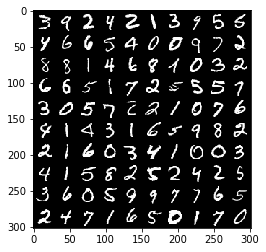

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# show images
grid = torchvision.utils.make_grid(images, 10)
npimg = grid.numpy()
plt.imshow(np.transpose(grid, (1, 2, 0)))


# Define a Neural Network

In [0]:
input_size = 784
hidden_size = 500
num_classes = 10
learning_rate = 1e-8
model = NeuralNet(input_size, hidden_size, num_classes)

Loss and Optimizer

In [0]:
# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

Train the model

In [0]:
num_epochs = 5

total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # Reshape images to (batch_size, input_size)
    images = images.reshape(-1, 28*28)
    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
        
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    if (i+1) % 100 == 0:
      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/480], Loss: 2.3202
Epoch [1/5], Step [200/480], Loss: 2.3034
Epoch [1/5], Step [300/480], Loss: 2.3100
Epoch [1/5], Step [400/480], Loss: 2.3149
Epoch [2/5], Step [100/480], Loss: 2.3301
Epoch [2/5], Step [200/480], Loss: 2.3031
Epoch [2/5], Step [300/480], Loss: 2.3156
Epoch [2/5], Step [400/480], Loss: 2.3195
Epoch [3/5], Step [100/480], Loss: 2.3115
Epoch [3/5], Step [200/480], Loss: 2.3122
Epoch [3/5], Step [300/480], Loss: 2.3176
Epoch [3/5], Step [400/480], Loss: 2.3137
Epoch [4/5], Step [100/480], Loss: 2.3155
Epoch [4/5], Step [200/480], Loss: 2.3122
Epoch [4/5], Step [300/480], Loss: 2.3124
Epoch [4/5], Step [400/480], Loss: 2.3329
Epoch [5/5], Step [100/480], Loss: 2.3129
Epoch [5/5], Step [200/480], Loss: 2.3231
Epoch [5/5], Step [300/480], Loss: 2.3100
Epoch [5/5], Step [400/480], Loss: 2.2955


Validate the Model

In [0]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in val_loader:
    images = images.reshape(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 8 %


Training on GPU

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cpu


The rest of this section assumes that `device` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:


    net.to(device)


Remember that you will have to send the inputs and targets at every step
to the GPU too:

    inputs, labels = inputs.to(device), labels.to(device)

Why dont I notice MASSIVE speedup compared to CPU? Because your network
is really small.